In [1]:
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import glob
import sklearn
from sklearn.cluster import KMeans

In [2]:
df2 = pd.read_csv("Li_vs_liang.m1.csv",index_col=0)
df2.columns = [0,1,2,3,4,5,'f_name']

In [3]:
df2.head()

,0,1,2,3,4,5,f_name
0,0.533780,48,1063,811,A,0,16
1,2.402010,49,832,750,B,1,72
2,3.603015,57,1414,928,A,9,108
3,4.270240,54,1207,747,B,6,128
4,5.271078,51,1354,794,A,3,158


In [5]:
trios = {}
trios['A'] = []
trios['B'] = []


In [11]:
for i in range(1,df2.shape[0]):
    try:
        pre_frame = df2.at[i-1,5]
        current_frame = df2.at[i,5]
        after_frame = df2.at[i+1,5]   
    except Exception as e:
        print (e)
        continue
    current_play = df2.at[i,4]
    if current_frame==0 or after_frame==0:
        continue
    trios[current_play].append(f"{pre_frame}{current_frame}{after_frame}")

65
65
65


In [15]:
df1 = pd.DataFrame(pd.DataFrame(trios['A'])[0].value_counts())
df1.columns=['A']
df2 = pd.DataFrame(pd.DataFrame(trios['B'])[0].value_counts())
df2.columns=['B']

In [20]:
df3 = pd.concat([df1,df2],axis=1).fillna(0)

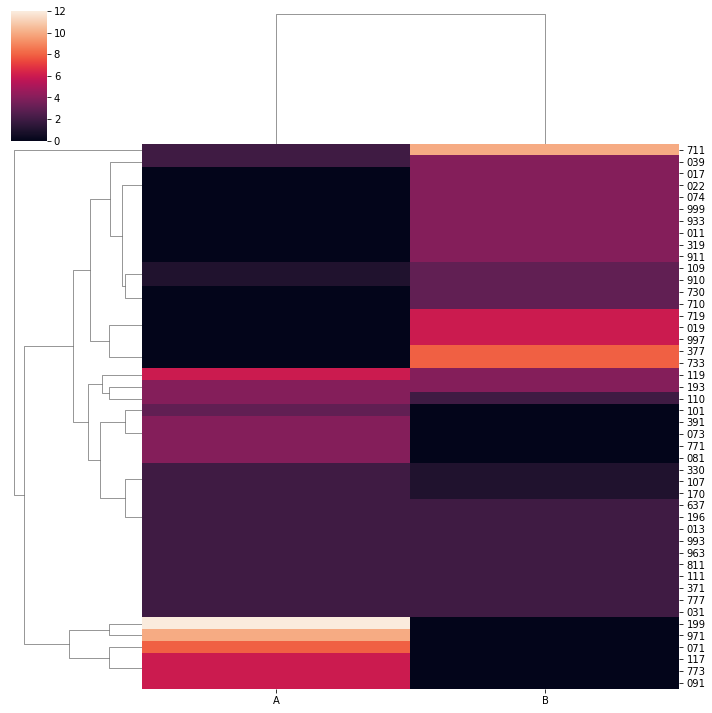

In [26]:
sns.clustermap(df3[df3.sum(axis=1)>2],yticklabels=True)

In [ ]:
df1.

In [14]:
df1

,0
199,12
971,10
071,8
773,6
119,6
...,...
001,1
290,1
701,1
870,1
